In [241]:
# IMPORTAR AS LIBS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [242]:
# LER OS DADOS

Base_Dados = pd.read_csv('Startups+in+2021+end.csv')

# verificar a dimensão

Base_Dados.shape

(936, 8)

In [243]:
# primeiros registros

Base_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [244]:
# colunas

Base_Dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [245]:
# renomear colunas

Base_Dados.rename( columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
},inplace = True)

In [246]:
# verificar tipo de informação

Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [247]:
# conversão para data

Base_Dados['Data de Adesão'] = pd.to_datetime(Base_Dados['Data de Adesão'])

Base_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [248]:
# transformando a coluna valor

Base_Dados['Valor ($)'] = pd.to_numeric(Base_Dados['Valor ($)'].apply(lambda Linha: Linha.replace('$', '')))

Base_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [249]:
# Renomeando campos (1):

Base_Dados['Setor'] = Base_Dados['Setor'].replace('Finttech', 'Fintech')

In [250]:
# Renomeando campos (2):

Base_Dados['Setor'] = Base_Dados['Setor'].replace('Artificial Intelligence', 'Artificial intelligence')

Base_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [251]:
# campos nulos

Base_Dados.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

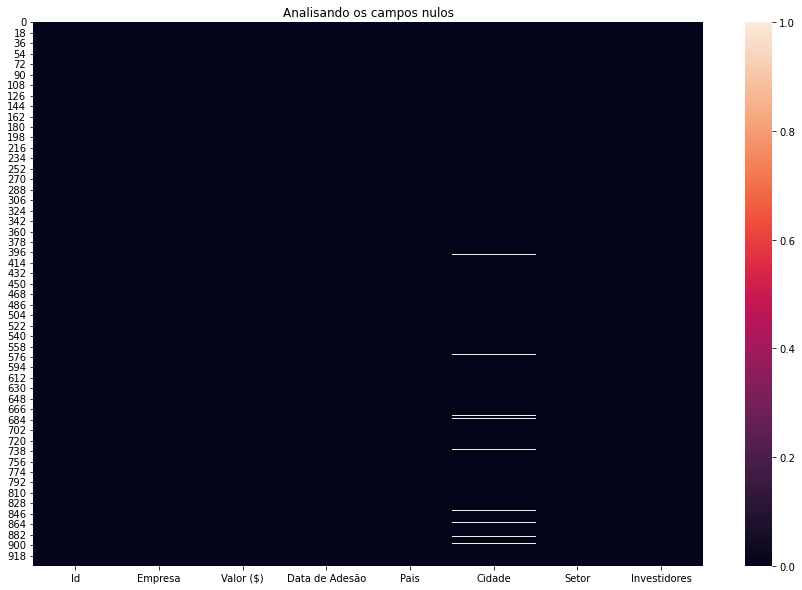

In [252]:
#gráfico

plt.figure( figsize=(15,10))
plt.title('Analisando os campos nulos')

sns.heatmap(Base_Dados.isnull());

In [253]:
# campos unicos

Base_Dados.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
Pais               47
Cidade            239
Setor              15
Investidores      920
dtype: int64

In [254]:
# valore unicos - rank

Base_Dados['Setor'].value_counts()

Fintech                                191
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 73
Health                                  63
Other                                   51
Supply chain, logistics, & delivery     51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Name: Setor, dtype: int64

In [255]:
# valore unicos - rank(%)

Base_Dados['Setor'].value_counts(normalize = True)

Fintech                                0.204060
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.077991
Health                                 0.067308
Other                                  0.054487
Supply chain, logistics, & delivery    0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Name: Setor, dtype: float64

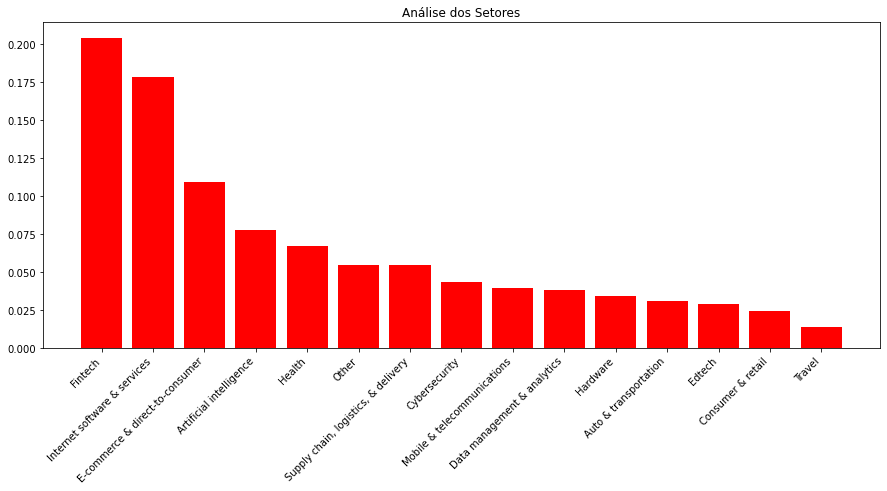

In [256]:
# PRINCIPAIS SETORES

plt.figure( figsize=(15,6))
plt.title('Análise dos Setores')
plt.bar(Base_Dados['Setor'].value_counts(normalize = True).index, Base_Dados['Setor'].value_counts(normalize = True), color = 'red')
plt.xticks(rotation = 45, ha = 'right');

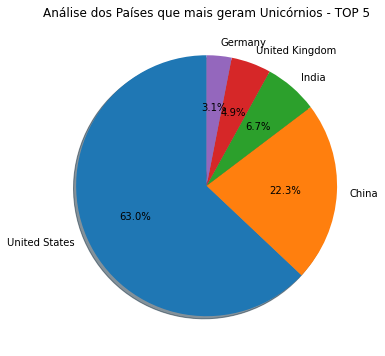

In [257]:
# PAISES QUE MAIS CRIAM STARTUPS

Analise = round(Base_Dados['Pais'].value_counts(normalize = True)*100,1) 

plt.figure( figsize=(15,6))
plt.title('Análise dos Países que mais geram Unicórnios - TOP 5')
plt.pie(
    Analise.head(),
    labels = Analise.index[0:5],
    shadow = True,
    startangle = 90,
    autopct = '%1.1f%%'
);

In [258]:
# EXTRAIR O ANO E O MÊS

Base_Dados['Mes'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).month
Base_Dados['Ano'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).year

Base_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [259]:
Analise_Agrupada = Base_Dados.groupby( by = ['Pais', 'Ano', 'Mes']).count()['Id'].reset_index()

Analise_Agrupada

,Pais,Ano,Mes,Id
0,Argentina,2021,8,1
1,Australia,2018,1,1
2,Australia,2019,3,1
3,Australia,2021,5,1
4,Australia,2021,7,2
...,...,...,...,...
373,United States,2021,10,26
374,United States,2021,11,30
375,United States,2021,12,8
376,"United States,",2021,9,1


In [260]:
Analise_Agrupada.loc[
    Analise_Agrupada['Pais'] == 'Brazil']

,Pais,Ano,Mes,Id
11,Brazil,2018,3,1
12,Brazil,2018,7,1
13,Brazil,2018,11,1
14,Brazil,2019,6,1
15,Brazil,2019,9,1
16,Brazil,2019,10,1
17,Brazil,2019,12,1
18,Brazil,2020,1,1
19,Brazil,2020,12,2
20,Brazil,2021,1,1


In [261]:
# ANALISE DE INVESTIMENTOS STARTUPS

Analise_Valor_Pais = Base_Dados.groupby( by = ['Pais']).sum()['Valor ($)'].reset_index().sort_values('Valor ($)', ascending = False)

Analise_Valor_Pais.head()

,Pais,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


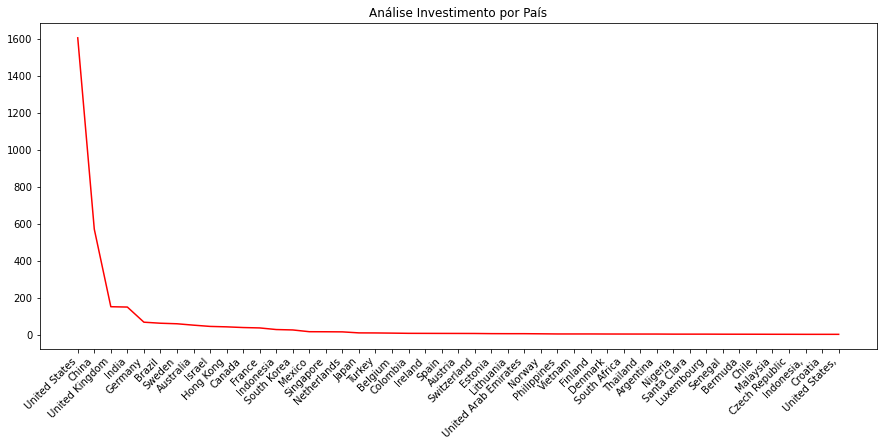

In [262]:
plt.figure( figsize=(15,6))
plt.title('Análise Investimento por País')
plt.plot(Analise_Valor_Pais['Pais'], Analise_Valor_Pais['Valor ($)'], color = 'red')
plt.xticks( rotation = 45, ha = 'right');

In [263]:
# Empresas que receberam maiores investimentos

Analise_Valor_Empresa = Base_Dados.groupby( by = ['Pais','Empresa']).sum()['Valor ($)'].reset_index().sort_values('Valor ($)', ascending = False)

Analise_Valor_Empresa.head()

,Pais,Empresa,Valor ($)
62,China,Bytedance,140.0
850,United States,SpaceX,100.3
860,United States,Stripe,95.0
407,Sweden,Klarna,45.6
2,Australia,Canva,40.0


In [264]:
Analise_Valor_Empresa.loc[
    Analise_Valor_Empresa['Pais'] == 'Brazil']

,Pais,Empresa,Valor ($)
21,Brazil,Nubank,30.00
23,Brazil,QuintoAndar,5.10
13,Brazil,C6 Bank,5.05
22,Brazil,Nuvemshop,3.10
25,Brazil,Wildlife Studios,3.00
17,Brazil,Loft,2.90
12,Brazil,1,2.15
18,Brazil,Loggi,2.00
15,Brazil,Creditas,1.75
24,Brazil,Unico,1.00


In [265]:
# MEDIDAS DE TENDENCIA CENTRAL

In [266]:
# Media:

Base_Dados['Valor ($)'].mean()

3.281153846153838

In [267]:
# Mediana:

Base_Dados['Valor ($)'].median()

1.6

In [268]:
Base_Dados['Valor ($)'].describe()

count    936.000000
mean       3.281154
std        7.473179
min        1.000000
25%        1.050000
50%        1.600000
75%        3.000000
max      140.000000
Name: Valor ($), dtype: float64

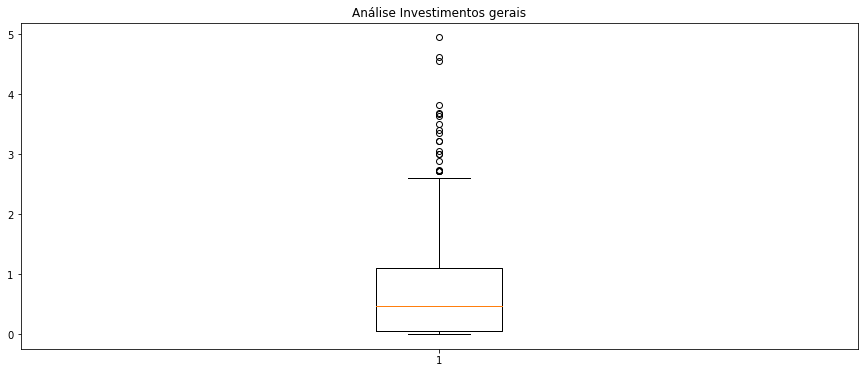

In [269]:
plt.figure( figsize=(15,6))
plt.title('Análise Investimentos gerais')
Base_Dados['log_valor'] = np.log(Base_Dados['Valor ($)'])
plt.boxplot(data = Base_Dados, x = 'log_valor');

In [270]:
# Amplitude

Base_Dados['Valor ($)'].max() - Base_Dados['Valor ($)'].min() 

139.0

In [271]:
# Variancia

Base_Dados['Valor ($)'].var()

55.84840123406011

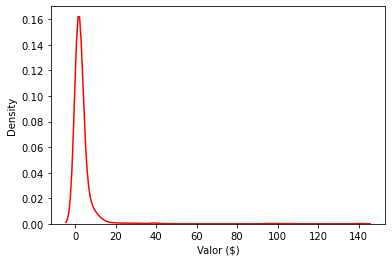

In [272]:
sns.kdeplot(Base_Dados['Valor ($)'],color = 'red');

In [273]:
# ANÁLISES EXTRAS:


Analise_Valor_Empresa.loc[
Analise_Valor_Empresa['Pais'] == 'Israel'].value_counts()

Pais    Empresa             Valor ($)
Israel  Aqua Security       1.00         1
        Melio               4.00         1
        VerbIT              2.00         1
        Transmit Security   2.74         1
        StarkWare           2.00         1
        Pagaya              2.00         1
        Orca Security       1.80         1
        OrCam Technologies  1.03         1
        Next Silicon        1.50         1
        Moon Active         5.00         1
        Lightricks          1.80         1
        Bringg              1.00         1
        JoyTunes            1.00         1
        InSightec           1.30         1
        Hibob               1.65         1
        Hailo               1.00         1
        Gett                1.50         1
        Earnix              2.00         1
        DriveNets           1.00         1
        Cato Networks       2.50         1
        Wiz                 6.00         1
dtype: int64

In [274]:
Analise_Valor_Empresa.loc[
    Analise_Valor_Empresa['Pais'] == 'Finland']

,Pais,Empresa,Valor ($)
219,Finland,Aiven,2.0
220,Finland,HMD Global,1.0


In [275]:
Analise_Israel_Empresa = Base_Dados.loc[(Base_Dados['Pais'] == 'Israel')].groupby( by = ['Pais']).count()['Empresa']

Analise_Israel_Empresa

Pais
Israel    21
Name: Empresa, dtype: int64

In [276]:
Analise_Israel = Base_Dados.loc[(Base_Dados['Pais'] == 'Israel') & (Base_Dados['Setor'] == 'Health')].groupby( by = ['Pais']).count()['Empresa']

Analise_Israel

Pais
Israel    1
Name: Empresa, dtype: int64